In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-big-bang-theory-series-transcript/1_10_seasons_tbbt.csv


# **The Big Bang Theory TV Series Transcript**

Thanks for opening this notebook! I found this great dataset while I was scrolling through the public datasets page. The Big Bang Theory is my favorite sitcom! The show premiered on September 24, 2007, and it concluded on May 16, 2019. In this notebook, I explore the data by generating Word Clouds. WordClouds in Python allows us to explore text data. Enjoy!

In [2]:
#import dataset
path = '/kaggle/input/the-big-bang-theory-series-transcript/1_10_seasons_tbbt.csv'

df = pd.read_csv(path)

In [3]:
df.head(5)

,episode_name,dialogue,person_scene
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard


In [4]:
df.tail(5)

,episode_name,dialogue,person_scene
54401,Series 10 Episode 24 – The Long Distance Disso...,"And I with you. Question, are you seeking a r...",Sheldon
54402,Series 10 Episode 24 – The Long Distance Disso...,What if I were?,Ramona
54403,Series 10 Episode 24 – The Long Distance Disso...,"Well, that would raise a number of problems. ...",Sheldon
54404,Series 10 Episode 24 – The Long Distance Disso...,Princeton.,Scene
54405,Series 10 Episode 24 – The Long Distance Disso...,"(Knock, knock, knock) Amy. (Knock, knock, kno...",Sheldon


This dataset contains dialogues from the sitcom. What words are mostly used by the main characters?

In [5]:
#episodes included in the dataset
df.episode_name.unique()

array(['Series 01 Episode 01 – Pilot\xa0Episode',
       'Series 01 Episode 02 – The Big Bran\xa0Hypothesis',
       'Series 01 Episode 03 – The Fuzzy Boots\xa0Corollary',
       'Series 01 Episode 04 – The Luminous Fish\xa0Effect',
       'Series 01 Episode 05 – The Hamburger\xa0Postulate',
       'Series 01 Episode 06 – The Middle Earth\xa0Paradigm',
       'Series 01 Episode 07 – The Dumpling\xa0Paradox',
       'Series 01 Episode 08 – The Grasshopper\xa0Experiment',
       'Series 01 Episode 09 – The Cooper-Hofstadter Polarization',
       'Series 01 Episode 10 – The Loobenfeld\xa0Decay',
       'Series 01 Episode 11 – The Pancake Batter\xa0Anomaly',
       'Series 01 Episode 12 – The Jerusalem\xa0Duality',
       'Series 01 Episode 13 – The Bat Jar\xa0Conjecture',
       'Series 01 Episode 14 – The Nerdvana\xa0Annihilation',
       'Series 01 Episode 15 – The Porkchop\xa0Indeterminacy',
       'Series 01 Episode 16 – The Peanut\xa0Reaction',
       'Series 01 Episode 17 – The Tang

In [6]:
df.person_scene.unique()

array(['Scene', 'Sheldon', 'Leonard', 'Receptionist', 'Penny', '(mouths)',
       'back)', 'Howard', 'Raj', 'Raj)', 'buzzer)', 'buzzer', 'Voice',
       'man', 'Man', '(sings)', '(off)', 'together', '(snarkily)',
       '(entering)', 'likewise)', 'off)', 'door)', 'talk)',
       '(internally)', 'mat)', 'him)', 'ear)', 'Teleplay', 'Story',
       'hallway)', 'Doug', 'Lesley', 'instructor', 'Leonard)',
       '(singing)', 'Waitress', 'Summer', 'Sheldon)', 'Gablehouser',
       'round)', 'supplements)', 'Cooper', 'Cooper)', 'chair)',
       '(leaving)', 'quartettist', 'room)', 'apartment)', '(inside)',
       '(arriving)', 'costume)', 'All', 'Thor)', 'off-screen)', 'Girl',
       'Costume', 'Kurt', 'ground)', 'entering)', 'doorway)', 'phone',
       'television)', 'again)', 'Christie', 'Waiter', '(answering)',
       '(voice)', 'within)', 'women)', 'Koothrappali', 'Together',
       'gather)', 'phone)', 'Lalita', 'Penny)', 'embarrassed)',
       'mailbox)', 'glasses)', 'down)', 'floor)', 

In [7]:
# Continue with loading all necessary libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [8]:
#list the main characters
persons = ['Sheldon', 'Leonard', 'Raj', 'Penny','Howard','Amy','Bernadette']

In [9]:
#other characters
others = ['Ramona','Beverley']

In [10]:
data = df[df.person_scene.isin(persons)]
data.head(5)

,episode_name,dialogue,person_scene
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard


Now, let's find out which words are mostly used by Sheldon.

In [11]:
sheldon = " ".join(dialogue for dialogue in data[data["person_scene"]=="Sheldon"].dialogue)

I create a list with stopwords. The list includes words that are often used in sentences.

In [12]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Leonard","Penny","Sheldon","Raj","Howard","Amy","Bernadette","Ramona","Beverly","Cooper","Dr","Leslie","Priya",
                  "one","two","three","first","second","a","an",
                  "it","s","ve","got","make","go","making","going","are","re","do","don","t","give","see","take","think","isn","want",
                  "will","ll","did","didn","let","know","say","need","haven","look","may","come","making","does","doesn","said","made","put",
                  "what","how","m","r","e","u","d","USA","India",
                  "Huh","Uh","Oh","Yes","No","Well","Really","right","Okay","Yeah","So","now","Ew","Ow",
                  "good","bad","ever","never","back","much","many","something","anything","some","any","Maybe","someone","anyone","somebody","anybody",
                  "may","might","Of","course","hello","please","sure",
                  "I","You","me","your","his","her","mine","us","we","them"
                 ])

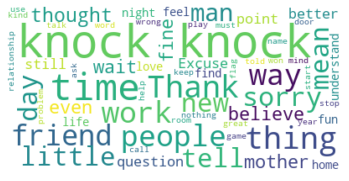

In [13]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=60, background_color="white").generate(sheldon)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

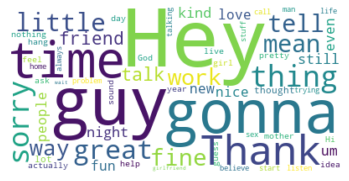

In [14]:
leonard = " ".join(dialogue for dialogue in data[data["person_scene"]=="Leonard"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=60, background_color="white").generate(leonard)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Now, let's look at the words at episode level.

**Halloween Party Episode**

In [15]:
#Halloween Party Episode
df_halloween = df[df.episode_name=="Series 01 Episode 06 – The Middle Earth\xa0Paradigm"]
df_halloween.head()

,episode_name,dialogue,person_scene
1310,Series 01 Episode 06 – The Middle Earth Paradigm,"Lobby of the apartment building, Howard, Raj,...",Scene
1311,Series 01 Episode 06 – The Middle Earth Paradigm,"Okay, if no-one else will say it, I will. We ...",Raj
1312,Series 01 Episode 06 – The Middle Earth Paradigm,That was absolutely humiliating.,Howard
1313,Series 01 Episode 06 – The Middle Earth Paradigm,"Oh, come on, some battles you win, some battl...",Leonard
1314,Series 01 Episode 06 – The Middle Earth Paradigm,"Yes, but you don’t have to lose to Kyle Berns...",Howard


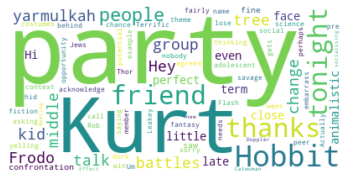

In [16]:
leonard = " ".join(dialogue for dialogue in df_halloween[df_halloween["person_scene"]=="Leonard"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=80, background_color="white").generate(leonard)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

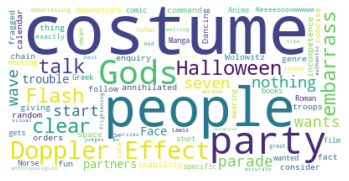

In [17]:
sheldon = " ".join(dialogue for dialogue in df_halloween[df_halloween["person_scene"]=="Sheldon"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=80, background_color="white").generate(sheldon)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

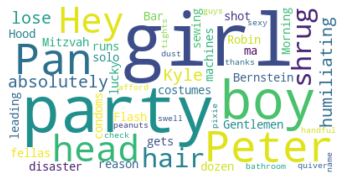

In [18]:
howard = " ".join(dialogue for dialogue in df_halloween[df_halloween["person_scene"]=="Howard"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="white").generate(howard)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

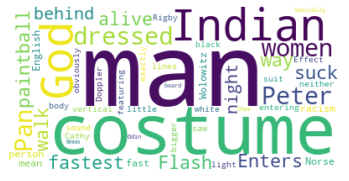

In [19]:
raj = " ".join(dialogue for dialogue in df_halloween[df_halloween["person_scene"]=="Raj"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="white").generate(raj)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Episode first visit Leonard's mother**

In [20]:
#Episode when Leonard's mother comes to visit
df_mother = df[df.episode_name=="Series 02 Episode 15 – The Maternal\xa0Capacitance"]
df_mother.head()

,episode_name,dialogue,person_scene
7704,Series 02 Episode 15 – The Maternal Capacitance,The apartment. The guys are playing Rock Band...,Scene
7705,Series 02 Episode 15 – The Maternal Capacitance,"Fellas, please.",Penny
7706,Series 02 Episode 15 – The Maternal Capacitance,"Penny, come on, we were just finding our sound.",Howard
7707,Series 02 Episode 15 – The Maternal Capacitance,You found it. It’s the sound of a cat being r...,Penny
7708,Series 02 Episode 15 – The Maternal Capacitance,I’m really very busy. Is there any way that w...,phone)


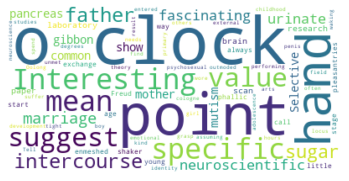

In [21]:
beverley = " ".join(dialogue for dialogue in df_mother[df_mother["person_scene"]=="Beverley"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=80, background_color="white").generate(beverley)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

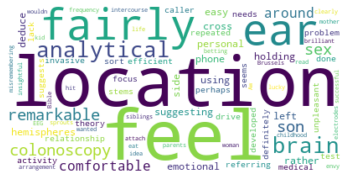

In [22]:
sheldon = " ".join(dialogue for dialogue in df_mother[df_mother["person_scene"]=="Sheldon"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=80, background_color="white").generate(sheldon)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**The Cooper-Nowitzki Theorem**

In [23]:
df_theorem = df[df.episode_name=="Series 02 Episode 06 – The Cooper-Nowitzki\xa0Theorem"]
df_theorem.head()

,episode_name,dialogue,person_scene
5574,Series 02 Episode 06 – The Cooper-Nowitzki The...,A lecture room at the university.,Scene
5575,Series 02 Episode 06 – The Cooper-Nowitzki The...,"So, if any of you are considering going into ...",Leonard
5576,Series 02 Episode 06 – The Cooper-Nowitzki The...,Forget it.,(off)
5577,Series 02 Episode 06 – The Cooper-Nowitzki The...,"Excuse me. Sheldon, we both agreed to do this.",Leonard
5578,Series 02 Episode 06 – The Cooper-Nowitzki The...,It’s a waste of time. I might as well explain...,(off)


In [24]:
ramona = " ".join(dialogue for dialogue in df_theorem[df_theorem["person_scene"]=="Ramona"].dialogue)

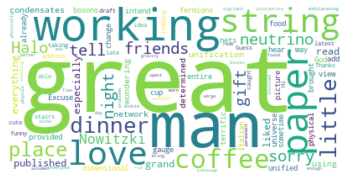

In [25]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(ramona)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

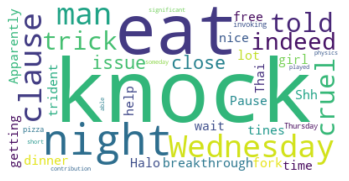

In [26]:
sheldon = " ".join(dialogue for dialogue in df_theorem[df_theorem["person_scene"]=="Sheldon"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=40, background_color="white").generate(sheldon)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**The Wildebeast Implementation Episode**

In [27]:
df_wildebeast = df[df.episode_name=="Series 04 Episode 22 – The Wildebeest\xa0Implementation"]
df_wildebeast.head()

,episode_name,dialogue,person_scene
20276,Series 04 Episode 22 – The Wildebeest Implemen...,A public washroom. Amy and Penny are in cubic...,Scene
20277,Series 04 Episode 22 – The Wildebeest Implemen...,"I must say, Penny, this is great fun.",Amy
20278,Series 04 Episode 22 – The Wildebeest Implemen...,Glad you’re enjoying yourself.,Penny
20279,Series 04 Episode 22 – The Wildebeest Implemen...,"Until I met you and Bernadette, my trips to t...",Amy
20280,Series 04 Episode 22 – The Wildebeest Implemen...,"Amy, you must’ve been in the bathroom with ot...",Bernadette


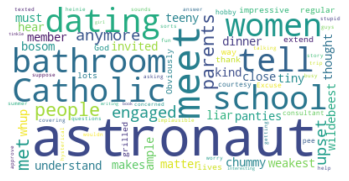

In [28]:
bernadette = " ".join(dialogue for dialogue in df_wildebeast[df_wildebeast["person_scene"]=="Bernadette"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=80, background_color="white").generate(bernadette)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**The episode with the new chair in Penny's appartment**

In [29]:
df_chair = df[df.episode_name=="Series 05 Episode 02 – The Infestation\xa0Hypothesis"]
df_chair.head()

,episode_name,dialogue,person_scene
21221,Series 05 Episode 02 – The Infestation Hypothesis,The apartment. Leonard is laying out wine and...,Scene
21222,Series 05 Episode 02 – The Infestation Hypothesis,What are you doing?,Sheldon
21223,Series 05 Episode 02 – The Infestation Hypothesis,"Oh, uh, Priya’s calling in a few minutes on S...",Leonard
21224,Series 05 Episode 02 – The Infestation Hypothesis,It’s eight o’clock in the morning in Mumbai. ...,Sheldon
21225,Series 05 Episode 02 – The Infestation Hypothesis,"Fine, whatever. Priya will be having breakfast.",Leonard


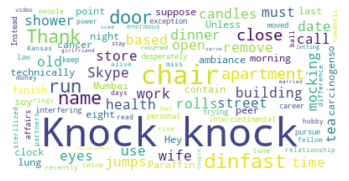

In [30]:
sheldon = " ".join(dialogue for dialogue in df_chair[df_chair["person_scene"]=="Sheldon"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(sheldon)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

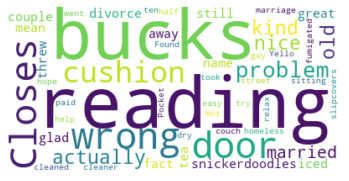

In [31]:
penny = " ".join(dialogue for dialogue in df_chair[df_chair["person_scene"]=="Penny"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="white").generate(penny)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

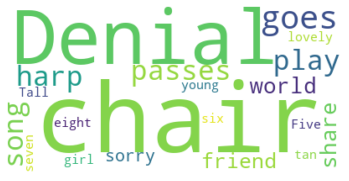

In [32]:
amy = " ".join(dialogue for dialogue in df_chair[df_chair["person_scene"]=="Amy"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=20, background_color="white").generate(amy)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**The Tenure Turbulence**

In [33]:
show = ["Series 06 Episode 20 – The Tenure\xa0Turbulence"]
df_tenure = df[df.episode_name.isin(show)]
df_tenure.head(5)

,episode_name,dialogue,person_scene
30307,Series 06 Episode 20 – The Tenure Turbulence,The cafeteria.,Scene
30308,Series 06 Episode 20 – The Tenure Turbulence,I was reading about this jellyfish that never...,Leonard
30309,Series 06 Episode 20 – The Tenure Turbulence,We thought my 90-year-old grandfather had rev...,Howard
30310,Series 06 Episode 20 – The Tenure Turbulence,"My point is, immortality is not only a possib...",Leonard
30311,Series 06 Episode 20 – The Tenure Turbulence,Only if you’re this jellyfish which periodica...,Raj


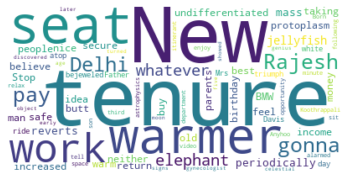

In [34]:
raj = " ".join(dialogue for dialogue in df_tenure[df_tenure["person_scene"]=="Raj"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=80, background_color="white").generate(raj)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

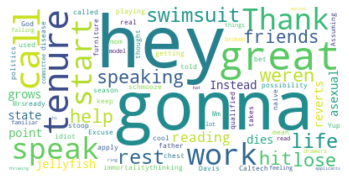

In [35]:
leonard = " ".join(dialogue for dialogue in df_tenure[df_tenure["person_scene"]=="Leonard"].dialogue)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=80, background_color="white").generate(leonard)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")